In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [3]:
meter_lucky = pd.read_excel('../Water Daily Sales/Raw Data/Year 2021/TwoStore_DailySale Jun-21.xlsx', sheet_name='Meter_Lucky', index_col='Date', parse_dates=True)

In [4]:
meter_lucky.tail()

,Unnamed: 0,Unnamed: 2,Meter,Daily,Daily AVG,Month AVG,Actual,YTD DailyAVG,MOM,Vending 1,Vending 2,Vend Sales,Unnamed: 13,Vend $$$,$Avg per day,Carbon,Sediment,Salt,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-28,2021-07-28 00:00:00,8074490.0,8076190.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-29,2021-07-29 00:00:00,8076370.0,8077930.0,1560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-30,2021-07-30 00:00:00,8078080.0,8079560.0,1480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,2021-07-31 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,2021-08-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing = meter_lucky.isnull().sum()/len(meter_lucky)*100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio':missing})

In [6]:
rename = {'Unnamed: 0':'Weekday', 'Unnamed: 2':'Meter In', 
          'Meter':'Meter Out', 'Carbon':'Vending/Inside', 'Unnamed: 13':'???', 
          'Vend Sales':'Vending Gallons', 'Vend $$$': 'Vending Revenue', 'Daily ': 'Daily'}
meter_lucky = meter_lucky.rename(columns=rename)

In [7]:
meter_lucky['Weekday'] = meter_lucky.index.day_name()
meter_lucky['Weekday'] = meter_lucky['Weekday'].apply(lambda x: x[:3])

In [8]:
daily_meter_lucky = meter_lucky[['Weekday', 'Meter In', 'Meter Out', 'Daily']]
vending_meter_lucky = meter_lucky[['Vending 1', 'Vending 2', 'Vending Gallons', 'Vending Revenue', 'Vending/Inside']]

In [9]:
daily_meter_lucky = daily_meter_lucky.iloc[:-2]

## Manually fixing bad data

In [10]:
daily_meter_lucky['Daily'][daily_meter_lucky['Daily'] < 0]

Date
2017-11-06      -2890.0
2021-07-02   -8027520.0
Name: Daily, dtype: float64

In [11]:
daily_meter_lucky.loc['2017-11-01':'2017-11-10']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2017-11-01,Wed,NaN,5586040.0,1510.0
2017-11-02,Thu,NaN,5587510.0,1470.0
2017-11-03,Fri,NaN,5593950.0,6440.0
2017-11-04,Sat,NaN,5595950.0,2000.0
2017-11-05,Sun,NaN,5598450.0,2500.0
2017-11-06,Mon,NaN,5595560.0,-2890.0
2017-11-07,Tue,NaN,5597200.0,1640.0
2017-11-08,Wed,NaN,5598840.0,1640.0
2017-11-09,Thu,NaN,5600520.0,1680.0


In [12]:
daily_meter_lucky['Daily'].loc['2016-11-01':'2016-11-30'].median()

1705.0

In [13]:
daily_meter_lucky['Meter Out'].loc['2017-11-03'] = 5589308.0
daily_meter_lucky['Meter Out'].loc['2017-11-04'] = 5591013.0
daily_meter_lucky['Meter Out'].loc['2017-11-05'] = 5592763.0
daily_meter_lucky['Meter Out'].loc['2017-11-06'] = 5594453.0
daily_meter_lucky['Meter Out'].loc['2017-11-06'] = 5595580.0
daily_meter_lucky['Meter Out'].loc['2017-11-07'] = 5597200.0
daily_meter_lucky['Meter Out'].loc['2017-11-08'] = 5598840.0 

In [14]:
daily_meter_lucky.loc['2021-06-30':'2021-07-03']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2021-06-30,Wed,8078080.0,8079560.0,1480.0
2021-07-01,Thu,8025260.0,8027320.0,2060.0
2021-07-02,Fri,8027520.0,0.0,-8027520.0
2021-07-03,Sat,8029420.0,8030960.0,1540.0


In [15]:
daily_meter_lucky['Meter Out'].loc['2021-07-02'] = 8029420.0

In [16]:
daily_meter_lucky.loc['2018-04-27':'2018-05-02']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2018-04-27,Fri,NaN,5913360.0,1690.0
2018-04-28,Sat,NaN,5915680.0,2320.0
2018-04-29,Sun,NaN,5918170.0,2490.0
2018-04-30,Mon,NaN,5919800.0,1630.0
2018-05-01,Tue,5919880.0,5921420.0,1620.0
2018-05-02,Wed,5921420.0,5923090.0,1670.0


In [17]:
daily_meter_lucky['Daily'][daily_meter_lucky['Daily'] > 5000]

Date
2017-11-03    6440.0
2020-04-12    9140.0
2020-09-09    6120.0
Name: Daily, dtype: float64

In [18]:
daily_meter_lucky.loc['2018-10-26':'2018-10-31']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2018-10-26,Fri,6260930.0,6262420.0,1570.0
2018-10-27,Sat,6262350.0,6264580.0,2160.0
2018-10-28,Sun,6264690.0,6266980.0,2400.0
2018-10-29,Mon,626780.0,6268850.0,1870.0
2018-10-30,Tue,626950.0,6270230.0,1380.0
2018-10-31,Wed,6270300.0,6271520.0,1290.0


In [19]:
daily_meter_lucky['Meter In'].loc['2018-10-29'] = 6267800.0
daily_meter_lucky['Meter In'].loc['2018-10-30'] = 6269500.0

In [20]:
daily_meter_lucky.loc['2018-08-27': '2018-08-31']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2018-08-27,Mon,6146450.0,6148210.0,1900.0
2018-08-28,Tue,6148320.0,6149970.0,1760.0
2018-08-29,Wed,6152110.0,6152030.0,2060.0
2018-08-30,Thu,6152030.0,6153530.0,1500.0
2018-08-31,Fri,6153570.0,6155420.0,1890.0


In [21]:
daily_meter_lucky['Meter In'].loc['2018-08-29'] = 6150120.0

In [22]:
daily_meter_lucky.loc['2018-10-05':'2018-10-12']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2018-10-05,Fri,6221520.0,6222830.0,1480.0
2018-10-06,Sat,NaN,6225230.0,2400.0
2018-10-07,Sun,6227810.0,6227830.0,2600.0
2018-10-08,Mon,6229850.0,6229630.0,1800.0
2018-10-09,Tue,NaN,6231130.0,1500.0
2018-10-10,Wed,6231860.0,6232390.0,1260.0
2018-10-11,Thu,6233610.0,6234270.0,1880.0
2018-10-12,Fri,6235010.0,6236240.0,1970.0


In [23]:
daily_meter_lucky['Meter In'].loc['2018-10-06'] = 6222900.0
daily_meter_lucky['Meter In'].loc['2018-10-07'] = 6225300.0
daily_meter_lucky['Meter In'].loc['2018-10-08'] = 6227940.0
daily_meter_lucky['Meter In'].loc['2018-10-09'] = 6229710.0

In [24]:
daily_meter_lucky.loc['2019-08-21':'2019-08-27']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2019-08-21,Wed,6814870.0,6816450.0,1820.0
2019-08-22,Thu,6816450.0,6817850.0,1400.0
2019-08-23,Fri,6818000.0,6820020.0,2170.0
2019-08-24,Sat,6870100.0,6822010.0,1990.0
2019-08-25,Sun,6822280.0,6824880.0,2870.0
2019-08-26,Mon,6824990.0,6826840.0,1960.0
2019-08-27,Tue,6826930.0,6828620.0,1780.0


In [25]:
daily_meter_lucky['Meter In'].loc['2019-08-24'] = 6820100.0

In [26]:
daily_meter_lucky.loc['2019-02-03':'2019-02-08']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2019-02-03,Sun,6442060.0,6443990.0,2010.0
2019-02-04,Mon,6444070.0,6445570.0,1580.0
2019-02-05,Tue,6445650.0,6446850.0,1280.0
2019-02-06,Wed,6448740.0,6448740.0,1890.0
2019-02-07,Thu,6448740.0,6450040.0,1300.0
2019-02-08,Fri,6450190.0,6451460.0,1420.0


In [27]:
daily_meter_lucky['Meter In'].loc['2019-02-06'] = 6446910.0

## Recalculating Daily and Daily w/ Vending

In [28]:
pre_meter_lucky = daily_meter_lucky.loc[:'2018-04-30']
pre_meter_lucky['Meter In'] = pre_meter_lucky['Meter Out'].shift(1)
pre_meter_lucky.head()

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2008-01-31,Thu,NaN,3560600.0,NaN
2008-02-01,Fri,3560600.0,3561780.0,1180.0
2008-02-02,Sat,3561780.0,3563440.0,1660.0
2008-02-03,Sun,3563440.0,3565320.0,1880.0
2008-02-04,Mon,3565320.0,3566720.0,1400.0


In [29]:
pre_meter_lucky.tail()

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2018-04-26,Thu,5910070.0,5911670.0,1600.0
2018-04-27,Fri,5911670.0,5913360.0,1690.0
2018-04-28,Sat,5913360.0,5915680.0,2320.0
2018-04-29,Sun,5915680.0,5918170.0,2490.0
2018-04-30,Mon,5918170.0,5919800.0,1630.0


In [30]:
post_meter_lucky = daily_meter_lucky.loc['2018-05-01':]

In [31]:
daily_meter_lucky = pd.concat([pre_meter_lucky, post_meter_lucky], axis=0)

In [32]:
daily_meter_lucky['Daily'] = daily_meter_lucky['Meter Out'] - daily_meter_lucky['Meter In']
daily_meter_lucky

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2008-01-31,Thu,NaN,3560600.0,NaN
2008-02-01,Fri,3560600.0,3561780.0,1180.0
2008-02-02,Sat,3561780.0,3563440.0,1660.0
2008-02-03,Sun,3563440.0,3565320.0,1880.0
2008-02-04,Mon,3565320.0,3566720.0,1400.0
...,...,...,...,...
2021-07-26,Mon,8070150.0,8071390.0,1240.0
2021-07-27,Tue,8072170.0,8074290.0,2120.0
2021-07-28,Wed,8074490.0,8076190.0,1700.0


In [33]:
daily_meter_lucky = daily_meter_lucky[1:]

<AxesSubplot:xlabel='Date'>

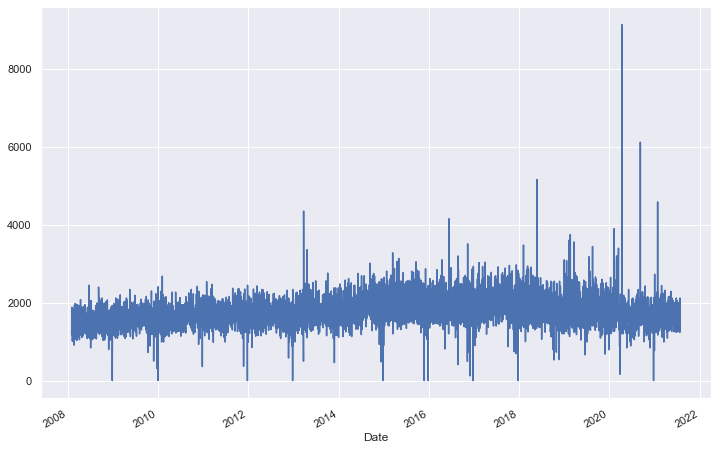

In [42]:
daily_meter_lucky['Daily'].plot(figsize=(12,8))

In [34]:
daily_meter_lucky['Daily'][daily_meter_lucky['Daily'] > 5000]

Date
2018-05-26    5160.0
2020-04-12    9140.0
2020-09-09    6120.0
Name: Daily, dtype: float64

## Predicted Water Revenue

In [35]:
daily_meter_lucky['Predicted Water Revenue'] = 0
daily_meter_lucky['Predicted Water Revenue'].loc[:'2015-03-31'] = daily_meter_lucky['Daily'].loc[:'2015-03-31']*0.25
daily_meter_lucky['Predicted Water Revenue'].loc['2015-04-01':'2018-02-28'] = daily_meter_lucky['Daily'].loc['2015-04-01':'2018-02-28']*0.3
daily_meter_lucky['Predicted Water Revenue'].loc['2018-02-28':] = daily_meter_lucky['Daily'].loc['2018-02-28':]*0.35

<AxesSubplot:xlabel='Date'>

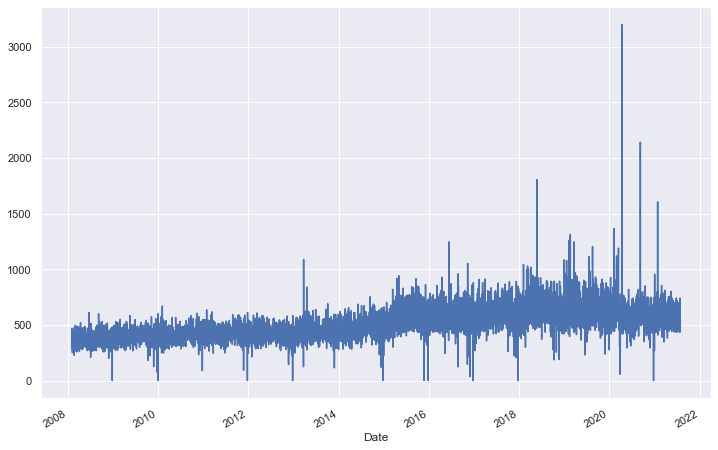

In [36]:
daily_meter_lucky['Predicted Water Revenue'].plot(figsize=(12,8))

Text(0.5, 0, 'Date')

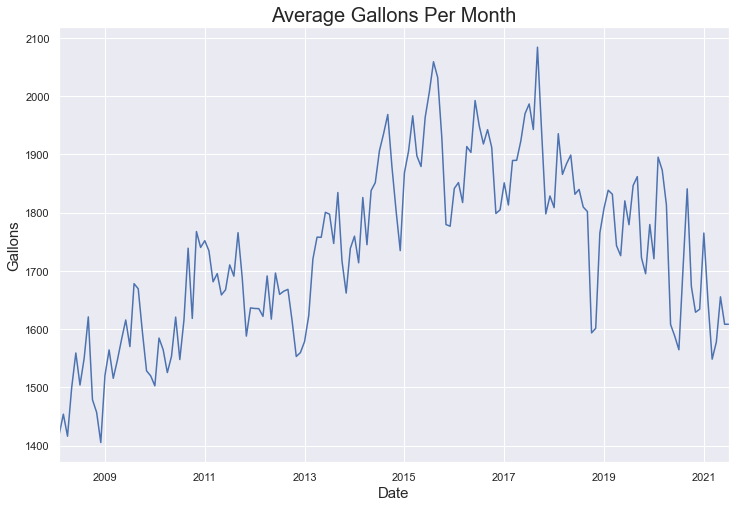

In [45]:
ax = daily_meter_lucky['Daily'].resample('MS').mean().plot(figsize=(12,8))
ax.set_title('Average Gallons Per Month', fontsize=20)
ax.set_ylabel('Gallons', fontsize=15)
ax.set_xlabel('Date',fontsize=15)

Text(21.200000000000003, 0.5, 'Dollars')

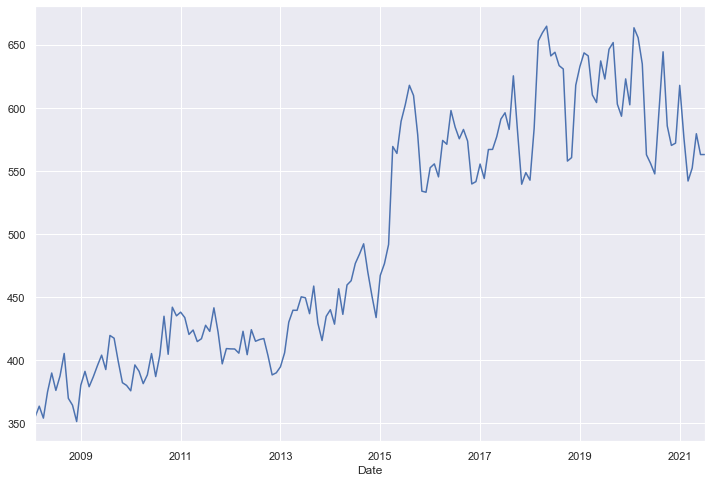

In [46]:
daily_meter_lucky['Predicted Water Revenue'].resample('MS').mean().plot(figsize=(12,8))
ax.set_title('Average Predicted Water Revenue Per Month')
ax.set_ylabel('Dollars')

In [47]:
daily_meter_lucky[['Predicted Water Revenue']]

,Predicted Water Revenue
Date,
2008-02-01,295.0
2008-02-02,415.0
2008-02-03,470.0
2008-02-04,350.0
2008-02-05,322.5
...,...
2021-07-26,434.0
2021-07-27,742.0
2021-07-28,595.0


In [38]:
daily_meter_lucky = daily_meter_lucky.dropna()
daily_meter_lucky = daily_meter_lucky.resample('D').sum().fillna(0)

## FM meter_lucky Data

In [40]:
meter_fm = pd.read_excel('../Water Daily Sales/Raw Data/Year 2021/TwoStore_DailySale Jun-21.xlsx', sheet_name='Meter_FM', index_col='Date', parse_dates=True)

In [41]:
missing = meter_fm.isnull().sum()/len(meter_fm)*100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio':missing})

In [42]:
meter_fm.columns

Index(['Unnamed: 0', 'Meter D', 'Meter N', 'Daily ', 'Daily AVG', 'Month AVG',
       'Actual', 'YTD DailyAVG', 'MOM', 'MoM%', 'V1', 'V2', 'V3', 'V4',
       'Total V', 'V Sales', 'V $$$', 'AVG per day', 'MoM%.1', 'GPD vending',
       'GPD total', '% vending/inside', 'Unnamed: 23'],
      dtype='object')

In [43]:
rename = {'Unnamed: 0': 'Weekday', 'Meter D':'Meter In', 'Meter N':'Meter Out', 'Daily ':'Daily'}
meter_fm = meter_fm.rename(columns=rename)

In [44]:
meter_fm.index.freq='D'

In [45]:
meter_fm['Weekday'] = meter_fm.index.day_name()
meter_fm['Weekday'] = meter_fm['Weekday'].apply(lambda x: x[:3])

In [46]:
meter_fm.head()

,Weekday,Meter In,Meter Out,Daily,Daily AVG,Month AVG,Actual,YTD DailyAVG,MOM,MoM%,V1,V2,V3,V4,Total V,V Sales,V $$$,AVG per day,MoM%.1,GPD vending,GPD total,% vending/inside,Unnamed: 23
Date,,,,,,,,,,,,,,,,,,,,,,,
2010-02-14,Sun,171890.0,NaN,0.0,NaN,0.0,NaN,2.500000,NaN,NaN,72850.0,90320.0,NaN,NaN,163170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,Mon,171895.0,NaN,5.0,NaN,0.0,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-16,Tue,174568.0,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-17,Wed,175800.0,NaN,NaN,NaN,NaN,NaN,38.333333,NaN,NaN,72890.0,90360.0,NaN,NaN,163250.0,80.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-18,Thu,177800.0,177910.0,110.0,NaN,NaN,NaN,41.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
daily_meter_fm = meter_fm[['Weekday', 'Meter In', 'Meter Out', 'Daily']]
daily_meter_fm.tail()

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2021-07-28,Wed,6728050.0,6729590.0,1540.0
2021-07-29,Thu,6729780.0,6730990.0,1210.0
2021-07-30,Fri,6731130.0,6732800.0,1670.0
2021-07-31,Sat,0.0,0.0,0.0
2021-08-01,Sun,NaN,NaN,NaN


In [48]:
daily_meter_fm = daily_meter_fm[4:-2]

<AxesSubplot:xlabel='Date'>

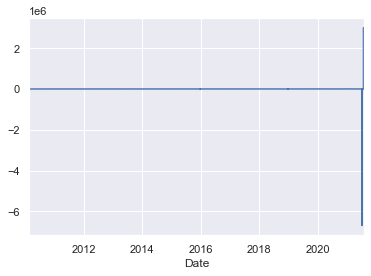

In [49]:
daily_meter_fm['Daily'].plot()

In [50]:
daily_meter_fm['Daily'][(daily_meter_fm['Daily'] < 0) | (daily_meter_fm['Daily'] > 5000)]

Date
2021-07-04   -6683690.0
2021-07-25    3001740.0
Name: Daily, dtype: float64

In [51]:
daily_meter_fm.loc['2021-07-01':'2021-07-7']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2021-07-01,Thu,6677720.0,6679890.0,2170.0
2021-07-02,Fri,6680060.0,6681720.0,1660.0
2021-07-03,Sat,6681870.0,6683530.0,1660.0
2021-07-04,Sun,6683690.0,0.0,-6683690.0
2021-07-05,Mon,6685080.0,6687050.0,1970.0
2021-07-06,Tue,6687150.0,6689260.0,2110.0
2021-07-07,Wed,6689440.0,6691090.0,1650.0


In [52]:
daily_meter_fm['Daily'].loc['2018-07-01':'2018-07-31'].median()

1560.0

In [53]:
daily_meter_fm['Meter Out'].loc['2021-07-04'] = 6685250.0

In [54]:
daily_meter_fm.loc['2021-07-22':'2021-07-28']

,Weekday,Meter In,Meter Out,Daily
Date,,,,
2021-07-22,Thu,6716840.0,6718620.0,1780.0
2021-07-23,Fri,6718760.0,6720070.0,1310.0
2021-07-24,Sat,6720170.0,6721690.0,1520.0
2021-07-25,Sun,3721820.0,6723560.0,3001740.0
2021-07-26,Mon,6723750.0,6725620.0,1870.0
2021-07-27,Tue,6725780.0,6727860.0,2080.0
2021-07-28,Wed,6728050.0,6729590.0,1540.0


In [55]:
daily_meter_fm['Meter In'].loc['2021-07-25'] = 6721820.0

In [56]:
daily_meter_fm['Daily'] = daily_meter_fm['Meter Out'] - daily_meter_fm['Meter In']

In [57]:
daily_meter_fm = daily_meter_fm.dropna()
daily_meter_fm = daily_meter_fm.resample('D').sum().fillna(0)

<AxesSubplot:xlabel='Date'>

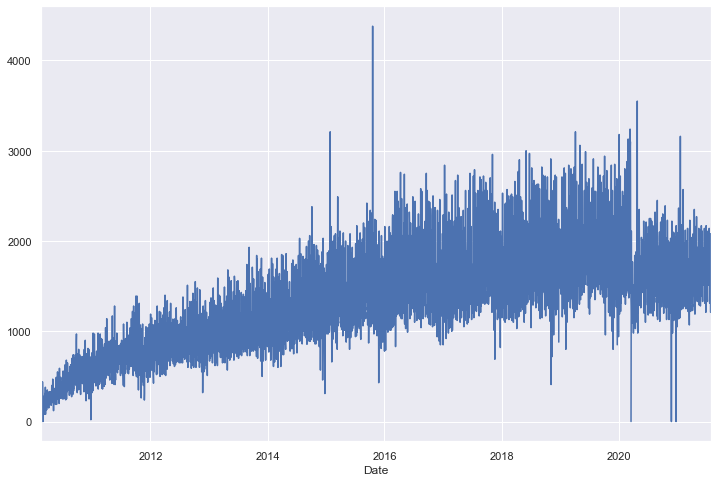

In [71]:
daily_meter_fm['Daily'].plot(figsize=(12,8))

In [72]:
daily_meter_fm['Daily'][daily_meter_fm['Daily'] == 0]

Date
2010-02-20    0.0
2010-02-22    0.0
2010-03-01    0.0
2020-03-19    0.0
2020-11-26    0.0
2020-12-25    0.0
Name: Daily, dtype: float64

<AxesSubplot:xlabel='Date'>

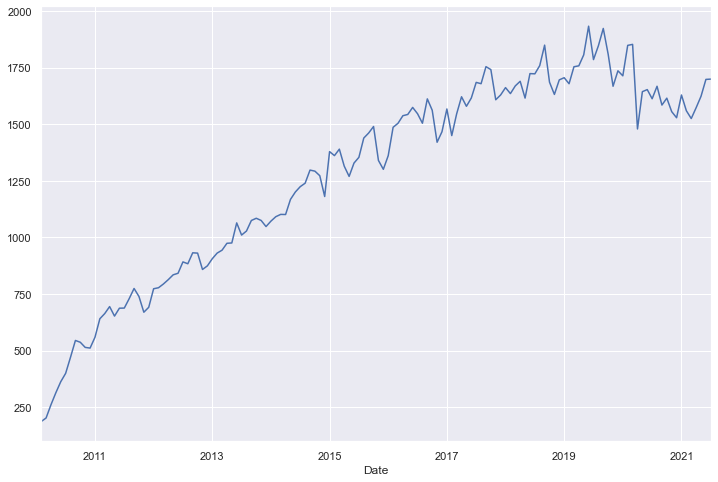

In [73]:
daily_meter_fm['Daily'].resample('MS').mean().plot(figsize=(12,8))

Text(0.5, 0, 'Date')

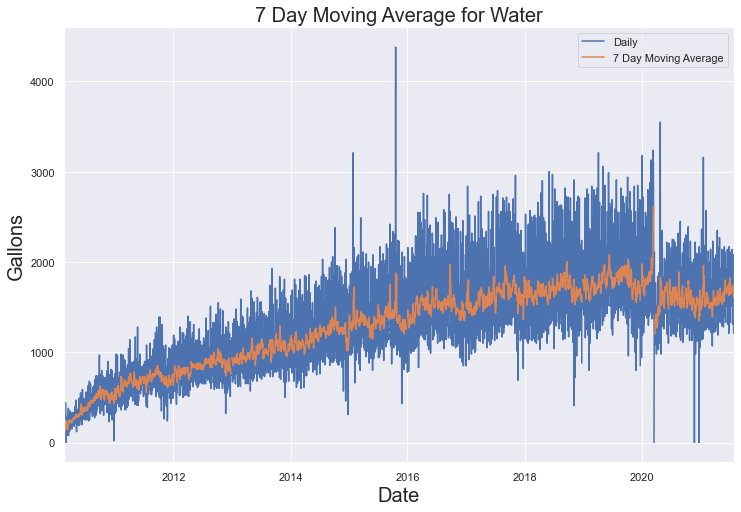

In [74]:
ax = daily_meter_fm['Daily'].plot(figsize=(12,8), legend=True)
rolling = daily_meter_fm['Daily'].rolling(window=7).mean().rename('7 Day Moving Average')
rolling.plot(figsize=(12,8), legend=True)
ax.set_title('7 Day Moving Average for Water', fontsize=20)
ax.set_ylabel('Gallons', fontsize=20)
ax.set_xlabel('Date', fontsize=20)

Text(0, 0.5, 'Dollars')

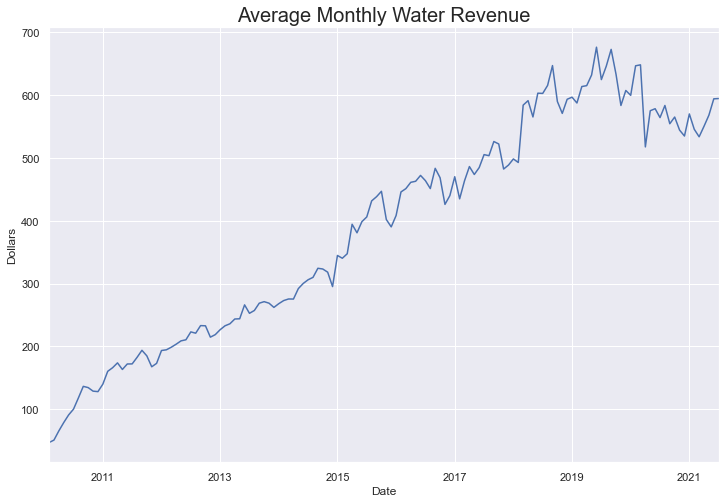

In [75]:
daily_meter_fm['Predicted Water Revenue'] = 0
daily_meter_fm['Predicted Water Revenue'].loc[:'2015-03-31'] = daily_meter_fm['Daily'].loc[:'2015-03-31']*0.25
daily_meter_fm['Predicted Water Revenue'].loc['2015-04-01':'2018-02-28'] = daily_meter_fm['Daily'].loc['2015-04-01':'2018-02-28']*0.3
daily_meter_fm['Predicted Water Revenue'].loc['2018-02-28':] = daily_meter_fm['Daily'].loc['2018-02-28':]*0.35
ax = daily_meter_fm['Predicted Water Revenue'].resample('M').mean().plot(figsize=(12,8))
ax.set_title('Average Monthly Water Revenue', fontsize=20)
ax.set_ylabel('Dollars')

### Vending Machine Data?

In [72]:
meter_fm.columns

Index(['Weekday', 'Meter In', 'Meter Out', 'Daily', 'Daily AVG', 'Month AVG',
       'Actual', 'YTD DailyAVG', 'MOM', 'MoM%', 'V1', 'V2', 'V3', 'V4',
       'Total V', 'V Sales', 'V $$$', 'AVG per day', 'MoM%.1', 'GPD vending',
       'GPD total', '% vending/inside', 'Unnamed: 23'],
      dtype='object')

In [73]:
vending = meter_fm[['V1', 'V2', 'V3', 'V4','Total V', 'V Sales', 'V $$$', '% vending/inside']]

In [74]:
vending = vending[['V1', 'V2', 'V3', 'V4','Total V']].dropna(how='all')

In [75]:
vending[['V1', 'V2']].loc['2014-02-14':'2014-10-14']

,V1,V2
Date,,
2014-02-27,163170.0,175180.0
2014-02-28,2996.0,1140.0
2014-03-30,166700.0,178370.0
2014-03-31,3530.0,3190.0
2014-04-29,169960.0,180990.0
2014-04-30,3260.0,2620.0
2014-05-30,174210.0,184330.0
2014-05-31,4250.0,3340.0
2014-06-29,178140.0,187680.0


In [76]:
vending.dtypes

V1         float64
V2         float64
V3         float64
V4         float64
Total V    float64
dtype: object

Text(0, 0.5, 'Gallons')

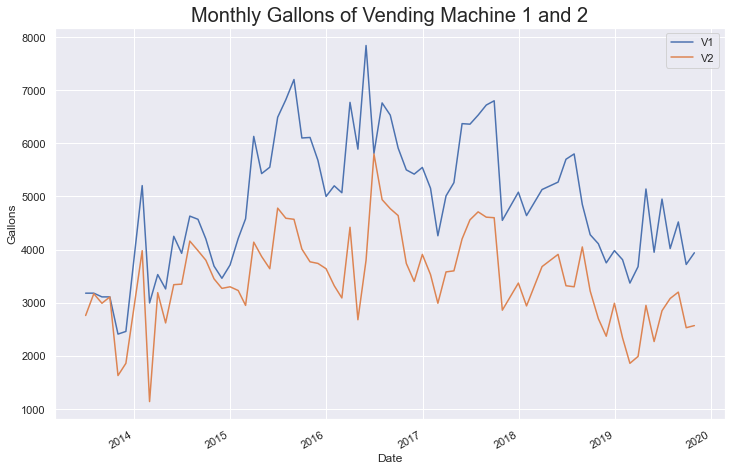

In [77]:
ax = vending[['V1', 'V2']][(vending['V1'] < 10000) & (vending['V2'] < 10000)].plot(figsize=(12,8))
ax.set_title('Monthly Gallons of Vending Machine 1 and 2', fontsize=20)
ax.set_ylabel('Gallons')

## Lion Meter Data

In [61]:
meter_lion = pd.read_excel('../Water Daily Sales/Raw Data/Year 2021/LionStore_DailySale Jun-21.xlsx', sheet_name='Meter_Lion', index_col='Date', parse_dates=True)

In [62]:
meter_lion.head()

,Unnamed: 0,Meter prepaid,Meter Cash,Daily,Daily AVG,Month AVG,Actual,YTD DailyAVG,MOM,MoM%,V1,V2,Total V,V Sales,V $$$,AVG per day,MoM%.1,Pre Filter,Post filter
Date,,,,,,,,,,,,,,,,,,,
2016-05-01,2016-05-01,991.0,NaN,991.0,NaN,NaN,NaN,991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-02,2016-05-02,811.0,NaN,811.0,NaN,NaN,NaN,901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,2016-05-03,708.0,NaN,708.0,NaN,NaN,NaN,836.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-04,2016-05-04,500.0,NaN,500.0,NaN,NaN,NaN,752.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-05,2016-05-05,645.0,NaN,645.0,NaN,NaN,NaN,731.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
meter_lion.index.freq = 'D'

In [64]:
meter_lion = meter_lion.rename(columns={'Unnamed: 0':'Weekday', 'Daily ':'Daily', 'Meter prepaid':'Meter Prepaid'})
meter_lion['Weekday'] = meter_lion.index.day_name()
meter_lion['Weekday'] = meter_lion['Weekday'].apply(lambda x: x[:3])
meter_lion.head()

,Weekday,Meter Prepaid,Meter Cash,Daily,Daily AVG,Month AVG,Actual,YTD DailyAVG,MOM,MoM%,V1,V2,Total V,V Sales,V $$$,AVG per day,MoM%.1,Pre Filter,Post filter
Date,,,,,,,,,,,,,,,,,,,
2016-05-01,Sun,991.0,NaN,991.0,NaN,NaN,NaN,991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-02,Mon,811.0,NaN,811.0,NaN,NaN,NaN,901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,Tue,708.0,NaN,708.0,NaN,NaN,NaN,836.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-04,Wed,500.0,NaN,500.0,NaN,NaN,NaN,752.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-05,Thu,645.0,NaN,645.0,NaN,NaN,NaN,731.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
missing = meter_lion.isnull().sum()/len(meter_lion)*100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio':missing})

In [66]:
meter_lion.columns

Index(['Weekday', 'Meter Prepaid', 'Meter Cash', 'Daily', 'Daily AVG',
       'Month AVG', 'Actual', 'YTD DailyAVG', 'MOM', 'MoM%', 'V1', 'V2',
       'Total V', 'V Sales', 'V $$$', 'AVG per day', 'MoM%.1', 'Pre Filter',
       'Post filter'],
      dtype='object')

In [67]:
daily_meter_lion = meter_lion[['Weekday', 'Meter Prepaid', 'Meter Cash', 'Daily']]

In [68]:
daily_meter_lion.tail()

,Weekday,Meter Prepaid,Meter Cash,Daily
Date,,,,
2021-07-06,Tue,NaN,NaN,NaN
2021-07-07,Wed,NaN,NaN,NaN
2021-07-08,Thu,NaN,NaN,NaN
2021-07-09,Fri,NaN,NaN,NaN
2021-07-10,Sat,NaN,NaN,NaN


In [69]:
daily_meter_lion[daily_meter_lion['Daily']==0].head(6)

,Weekday,Meter Prepaid,Meter Cash,Daily
Date,,,,
2016-11-24,Thu,NaN,NaN,0.0
2016-12-25,Sun,NaN,NaN,0.0
2017-11-23,Thu,NaN,NaN,0.0
2017-12-25,Mon,NaN,NaN,0.0
2020-12-01,Tue,NaN,NaN,0.0
2020-12-02,Wed,NaN,NaN,0.0


In [70]:
daily_meter_lion = daily_meter_lion[:'2020-11-30']
daily_meter_lion = daily_meter_lion.fillna(0)

<AxesSubplot:xlabel='Date'>

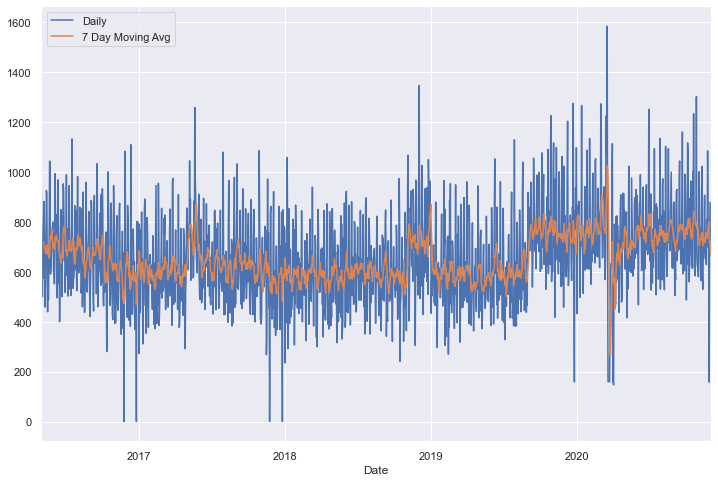

In [90]:
daily_meter_lion['Daily'].plot(figsize=(12,8), legend=True)
rolling = daily_meter_lion['Daily'].rolling(window=7).mean().rename('7 Day Moving Avg')
rolling.plot(legend=True)

<AxesSubplot:xlabel='Date'>

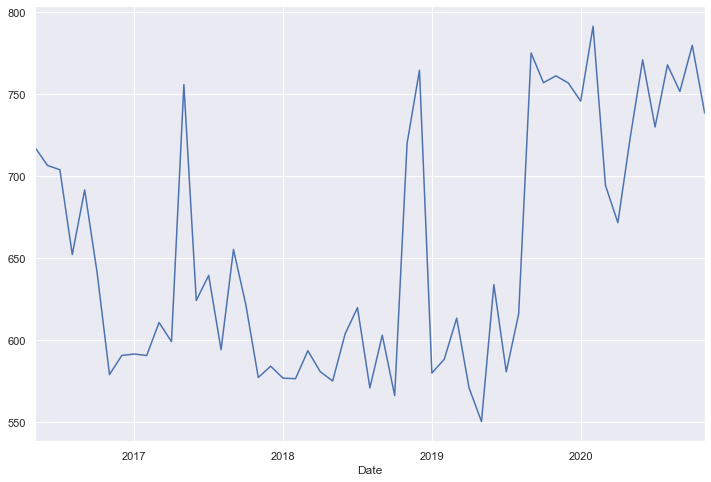

In [91]:
daily_meter_lion['Daily'].resample('M').mean().plot(figsize=(12,8))

In [140]:
meter_lion.columns

Index(['Weekday', 'Meter Prepaid', 'Meter Cash', 'Daily', 'Daily AVG',
       'Month AVG', 'Actual', 'YTD DailyAVG', 'MOM', 'MoM%', 'V1', 'V2',
       'Total V', 'V Sales', 'V $$$', 'AVG per day', 'MoM%.1', 'Pre Filter',
       'Post filter'],
      dtype='object')

In [142]:
vending_lion = meter_lion[['V1','V2']].dropna(how='all')

<AxesSubplot:xlabel='Date'>

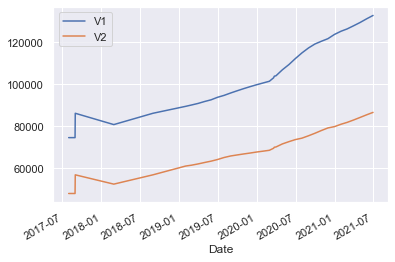

In [144]:
vending_lion.plot()

In [71]:
daily_meter_lion = daily_meter_lion.dropna()
daily_meter_lion = daily_meter_lion.resample('D').sum().fillna(0)

## Exporting

In [79]:
daily_meter_lucky.to_csv('meter_lucky.csv')
daily_meter_fm.to_csv('meter_fm.csv')
vending.to_csv('vending_fm.csv')
daily_meter_lion.to_csv('meter_lion.csv')